<a href="https://colab.research.google.com/github/brendanpshea/database_sql/blob/main/Database_03_Stark's_SQL_Secrets.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Stark's SQL Secrets: Mastering Data Types, Operations, and Security in the Marvel Universe
### Brendan Shea, PhD

In this chapter, we'll be introducing some basic SQL functions for dealing with numbers, dates, strings, and NULL values in SQL. The functions here are all part of **ANSI Standard SQL**, which means they should (mostly) work with other relational database systems, such as PostGres, MySQL, Oracle, or SQL Server. For this lab, we'll be using **PostgreSQL**. Along the way, we'll also be introducing some fundamental concepts related to database security and data privacy.

To help us apply the concepts, we're going to work on a (ficitonal) case study inspired by Tony Stark ("Ironman") of the Marvel Universe.


## Brendan's Lecture
To see my lecture, you can run the cell below:

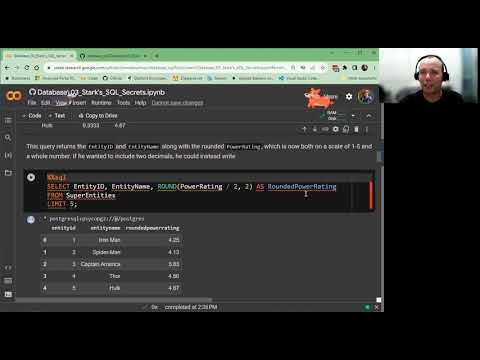

In [11]:
from IPython.display import YouTubeVideo
YouTubeVideo('ftJKuz5f_-Q', width=1000, height=600)

## Case Study: Tony Stark's Super SQL Database
As we venture into the world of SQL, we are not alone. Joining us in this expedition is none other than the genius billionaire playboy philanthropist himself, Tony Stark. Just as Tony Stark employs a multitude of technologies to aid in his superhero endeavours, we too will be harnessing the power of various data types in SQL to manipulate and analyze our data.

This chapter takes an in-depth look at working with different types of data in ANSI standard SQL, focusing on mathematical operations, string manipulations, and handling null data. We will be exploring the principles of order of operations, column aliases, and calculated columns. Using these principles, we will then delve into creating sophisticated queries and perform complex operations, unlocking insights about superheroes and supervillains from the vast Marvel Universe.

To give context to our exploration, we have a single table database curated by Tony Stark himself, compiling details of the heroes he has worked with and the villains he has faced over the years.

Let's start by creating this database:

In [ ]:
# For this section, we need to use PostgreSQL,
# which fully support ANSI SQL Math and Date Functions

!apt install postgresql postgresql-contrib &>log
!service postgresql start
!sudo -u postgres psql -c "CREATE USER root WITH SUPERUSER"
# set connection
%load_ext sql
%sql postgresql+psycopg2://@/postgres

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.4/6.4 MB 10.0 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
 * Starting PostgreSQL 14 database server
   ...done.
CREATE ROLE


Now, let's create a table:

In [ ]:
%%sql
DROP TABLE IF EXISTS SuperEntities;
CREATE TABLE SuperEntities (
    EntityID INT PRIMARY KEY, -- Integer column to hold unique IDs for each entity
    EntityName VARCHAR(255), -- String (VARCHAR) column to store the name of the superhero/villain
    FirstAppearance DATE, --  Date of first appearance date of the superhero/villain
    PowerRating NUMERIC, -- Float column to store a power rating for the superhero/villain
    IsHero BOOLEAN, -- 1 for hero, 0 for villain
    Notes TEXT -- A short description or notes about the superhero/villain
);


 * postgresql+psycopg2://@/postgres


""


Now, let's insert some sample heroes and villains:

In [ ]:
%%sql
DELETE FROM SuperEntities;
INSERT INTO SuperEntities
(EntityID, EntityName, FirstAppearance, PowerRating, IsHero, Notes)
VALUES
(1, 'Iron Man', '1963-03-01', 10, TRUE, NULL),
(2, 'Spider-Man', '1962-08-01', 8.25, TRUE, 'Peter Parker, bitten by a radioactive spider, becomes Spider-Man'),
(3, 'Captain America', '1941-03-01', 7.66667, TRUE, 'Steve Rogers, enhanced to the peak of human perfection, is Captain America'),
(4, 'Thor', NULL, 9.125, TRUE, 'Thor is the Asgardian God of Thunder'),
(5, 'Hulk', '1962-05-01', 9.3333, TRUE, 'Bruce Banner transforms into the Hulk when angered'),
(6, 'Black Widow', '1964-04-01', 6.999999, TRUE, 'Natasha Romanoff, master spy, is the Black Widow'),
(7, 'Hawkeye', '1964-09-01', 6.5, TRUE, NULL),
(8, 'Captain Marvel', '1967-12-01', 9.333333, TRUE, 'Carol Danvers is an Air Force pilot turned super-powered hero'),
(9, 'Black Panther', '1966-07-01', 8.333333, TRUE, 'TChalla, king of Wakanda, is the Black Panther'),
(10, 'Ant-Man', '1962-01-01', 7.34546, TRUE, 'Scott Lang, thief turned hero, is the second Ant-Man'),
(11, 'Thanos', '1973-02-01', 9.75, FALSE, 'Thanos, the Mad Titan, seeks the Infinity Stones to control the universe'),
(12, 'Loki', NULL, 8.75, FALSE, 'Loki is the Asgardian God of Mischief and Thor''s brother'),
(13, 'Green Goblin', '1964-07-01', 7.88975, FALSE, 'Norman Osborn becomes the Green Goblin, archenemy of Spider-Man'),
(14, 'Doctor Doom', '1962-07-01', 9.333333, FALSE, 'Victor Von Doom is a genius sorcerer and technologist'),
(15, 'Magneto', '1963-09-01', 9.032423, FALSE, 'Magneto is a powerful mutant who can control magnetic fields'),
(16, 'Red Skull', '1941-03-01', 7.645, FALSE, 'Johann Schmidt, the Red Skull, is Captain America''s nemesis'),
(17, 'Ultron', '1968-07-01', 9.5, FALSE, 'Ultron is a sentient robot who seeks to eradicate humanity'),
(18, 'Venom', '1988-05-01', 8.9234325, FALSE, 'Venom is a Symbiote, an alien organism, bonding with its host for survival'),
(19, 'Mandarin', '1964-02-01', NULL, FALSE, 'The Mandarin is a genius scientist and a superhumanly skilled martial artist'),
(20, 'Kingpin', '1967-07-01', 7.11111, FALSE, 'Wilson Fisk, the Kingpin, is a crime lord and the archenemy of Daredevil'),
(21, 'Scarlet Witch', '1964-03-01', 9.3, NULL, 'Wanda Maximoff, the Scarlet Witch, has reality-warping abilities'),
(22, 'Punisher', '1974-02-01', 6.9, NULL, 'Frank Castle is a vigilante who employs murder, kidnapping, and torture in his war on crime'),
(23, 'Deadpool', '1991-08-01', 7.8, TRUE, NULL),
(24, 'Blade', '1973-07-01', NULL, TRUE, 'Eric Brooks, known as Blade, is a day-walking vampire hunter'),
(25, 'Elektra', '1981-01-01', 7.5, NULL, 'Elektra Natchios is a highly trained assassin often allied with Daredevil'),
(26, 'Wolverine', '1974-10-01', 9.0, TRUE, 'Logan, or Wolverine, is a mutant with animal-keen senses and healing factor'),
(27, 'Nebula', '1985-07-01', NULL, NULL, 'Nebula is a space pirate and mercenary, and the adopted daughter of Thanos'),
(28, 'Dark Phoenix', '1980-01-01', 9.8, FALSE, 'Jean Grey becomes the Dark Phoenix when she is corrupted by the Phoenix Force'),
(29, 'Groot', '1960-11-01', 8.0, TRUE, 'Groot is a Flora colossus from Planet X, a member of the Guardians of the Galaxy'),
(30, 'Rocket Raccoon', '1976-06-01', 6.6, TRUE, NULL);


 * postgresql+psycopg2://@/postgres


""


In [ ]:
%%sql
--let's view the "head" of the table
SELECT * FROM SuperEntities LIMIT 10;

 * postgresql+psycopg2://@/postgres
10 rows affected.


entityid,entityname,firstappearance,powerrating,ishero,notes
1,Iron Man,1963-03-01,10,True,None
2,Spider-Man,1962-08-01,8.25,True,"Peter Parker, bitten by a radioactive spider, becomes Spider-Man"
3,Captain America,1941-03-01,7.66667,True,"Steve Rogers, enhanced to the peak of human perfection, is Captain America"
4,Thor,None,9.125,True,Thor is the Asgardian God of Thunder
5,Hulk,1962-05-01,9.3333,True,Bruce Banner transforms into the Hulk when angered
6,Black Widow,1964-04-01,6.999999,True,"Natasha Romanoff, master spy, is the Black Widow"
7,Hawkeye,1964-09-01,6.5,True,None
8,Captain Marvel,1967-12-01,9.333333,True,Carol Danvers is an Air Force pilot turned super-powered hero
9,Black Panther,1966-07-01,8.333333,True,"TChalla, king of Wakanda, is the Black Panther"
10,Ant-Man,1962-01-01,7.34546,True,"Scott Lang, thief turned hero, is the second Ant-Man"


This database contains a single table - `SuperEntities` - which holds information about various superheroes and villains. As you explore the database, you'll encounter a variety of data types:

1.  String: Also known as `VARCHAR` in SQL, string data types represent sequences of characters. In our `SuperEntities` table, the `EntityName` and `Notes` fields are examples of string data types. For example, 'Iron Man' in `EntityName` or 'Tony Stark, a genius inventor and businessman' in `Notes`.

2.  Integer: An integer data type represents whole numbers (both positive and negative). The `EntityID` field is an integer that uniquely identifies each entity in the table.

3.  Numeric: This data type represents numbers that have a decimal point. The `PowerRating` field is an example of a float. It's used to represent the power level of an entity on a scale of 1.0 to 10.0.

4.  Boolean: A boolean data type represents two possible values: TRUE or FALSE. The `IsHero` field is a boolean indicating whether the entity is a hero (TRUE) or a villain (FALSE).

5.  Date: Date data types are used to represent date values. The `FirstAppearance` field is a date, showing when each entity first appeared.

As you interact with the `super_stark` database, you'll also come across NULL values. A NULL value in SQL signifies that the information is unknown, not applicable, or deliberately left empty. For instance, if an entity's `PowerRating` is yet to be determined, the corresponding field would contain a NULL value. Later in this chapter, we'll conisder how to deal with these.

## Mathematical Functions in SQL

Mathematical functions in SQL are powerful tools that allow you to manipulate and analyze numeric data within your database. Whether it's changing the scale of a rating system, grouping entities for balanced team creation, or making precision adjustments to measurements, SQL's mathematical operations can make these tasks more straightforward.

### Basic Arithmetic Operations in SQL

The basic arithmetic operations in SQL - addition (+), subtraction (-), multiplication (*), and division (/) - allow you to perform computations directly on your data.

For example, suppose Tony Stark wants to recalibrate the `PowerRating` of each entity from a scale of 1-10 to a scale of 1-5 to match a new universal power measurement scale. He could do this using division:

In [ ]:
%%sql
SELECT entityname, powerrating, (PowerRating / 2) AS NewPowerRating
FROM SuperEntities
LIMIT 5;


 * postgresql+psycopg2://@/postgres


,entityname,powerrating,newpowerrating
0,Iron Man,10,5.0000000000000000
1,Spider-Man,8.25,4.1250000000000000
2,Captain America,7.66667,3.8333350000000000
3,Thor,9.125,4.5625000000000000
4,Hulk,9.3333,4.6666500000000000


Here, NewPowerRating is calculated by dividing the original PowerRating by 2, effectively transforming the scale from 1-10 to 1-5. The `AS` keyword is used to assign a new **column alias** to the **calculated column** (the new column produced by the calculation).

### `ROUND(number, decimal_places)`
Tony may want to simplify this further by rounding these new power ratings to the nearest whole number, making the ratings easier for a general audience to understand. He can use the `ROUND` function for this:

In [ ]:
%%sql
SELECT entityname, powerrating, ROUND(PowerRating / 2) AS NewPowerRating
FROM SuperEntities
LIMIT 5;


 * postgresql+psycopg2://@/postgres


,entityname,powerrating,newpowerrating
0,Iron Man,10,5
1,Spider-Man,8.25,4
2,Captain America,7.66667,4
3,Thor,9.125,5
4,Hulk,9.3333,5


This query returns the `EntityID` and `EntityName` along with the rounded `PowerRating`, which is now both on a scale of 1-5 and a whole number. If he wanted to include two decimals, he could instead write

In [ ]:
%%sql
SELECT EntityName, PowerRating, ROUND(PowerRating / 2, 2) AS RoundedPowerRating
FROM SuperEntities
LIMIT 5;

 * postgresql+psycopg2://@/postgres
5 rows affected.


entityname,powerrating,roundedpowerrating
Iron Man,10,5.00
Spider-Man,8.25,4.13
Captain America,7.66667,3.83
Thor,9.125,4.56
Hulk,9.3333,4.67


(Note: The "::numeric" here is necessary for PostGres to round a "FLOAT").

### `TRUNC(number, decimal_places)`

In SQL, the TRUNC function is used to truncate a number to a certain number of decimal places. Unlike the `ROUND` function, `TRUNC` simply removes the extra decimal places without considering the value.  For example, if Tony wants to truncate the PowerRating to 1 decimal place, he could use the TRUNC function:

In [ ]:
%%sql
SELECT EntityName, powerrating, TRUNC(PowerRating ,1)
FROM SuperEntities
LIMIT 5;

 * postgresql+psycopg2://@/postgres


,entityname,powerrating,trunc
0,Iron Man,10,10.0
1,Spider-Man,8.25,8.2
2,Captain America,7.66667,7.6
3,Thor,9.125,9.1
4,Hulk,9.3333,9.3


## `MOD(number_1, number_2)` gives the remainder

The `MOD` (or `%`) function, which provides the remainder of a division operation, can be useful for creating groups.  Suppose Tony wants to assign superheroes and villains to two separate teams (for a pick-up soccer game, perhaps).

He could use the MOD function to distribute the entities evenly:

In [ ]:
%%sql
SELECT EntityID, EntityName, MOD(EntityID,2) AS Team
FROM SuperEntities
LIMIT 12;

 * postgresql+psycopg2://@/postgres
12 rows affected.


entityid,entityname,team
1,Iron Man,1
2,Spider-Man,0
3,Captain America,1
4,Thor,0
5,Hulk,1
6,Black Widow,0
7,Hawkeye,1
8,Captain Marvel,0
9,Black Panther,1
10,Ant-Man,0


If he wanted to instead divide them into four teams numbered 1 to 4, he could instead do the following:

In [ ]:
%%sql
SELECT EntityID, EntityName, MOD(EntityID, 4) + 1 AS Team
FROM SuperEntities
LIMIT 12;

 * postgresql+psycopg2://@/postgres
12 rows affected.


entityid,entityname,team
1,Iron Man,2
2,Spider-Man,3
3,Captain America,4
4,Thor,1
5,Hulk,2
6,Black Widow,3
7,Hawkeye,4
8,Captain Marvel,1
9,Black Panther,2
10,Ant-Man,3


## Performing Arithmetic with Dates

Performing calculations with dates is common in SQL. The operations can be as simple as adding or subtracting days to a date, or more complex, like extracting the month or year from a date.

For example, if Tony wants to find out what the date would be 30 days after each FirstAppearance, he could add 30 to the FirstAppearance column:

In [ ]:
%%sql
SELECT EntityName, FirstAppearance, (FirstAppearance + INTERVAL '30 days') AS MonthLater
FROM SuperEntities
LIMIT 10;

 * postgresql+psycopg2://@/postgres
10 rows affected.


entityname,firstappearance,monthlater
Iron Man,1963-03-01,1963-03-31 00:00:00
Spider-Man,1962-08-01,1962-08-31 00:00:00
Captain America,1941-03-01,1941-03-31 00:00:00
Thor,None,None
Hulk,1962-05-01,1962-05-31 00:00:00
Black Widow,1964-04-01,1964-05-01 00:00:00
Hawkeye,1964-09-01,1964-10-01 00:00:00
Captain Marvel,1967-12-01,1967-12-31 00:00:00
Black Panther,1966-07-01,1966-07-31 00:00:00
Ant-Man,1962-01-01,1962-01-31 00:00:00


Here: ` (FirstAppearance + INTERVAL '30 days')` is an expression that calculates the date that is 30 days after the `FirstAppearance` date. `AS MonthLater` an alias for the expression. This allows us to give the expression a more meaningful name.

He might also want to find the difference between two dates (for example, my birthday!). For example:

In [ ]:
%%sql
SELECT EntityName, FirstAppearance, (DATE '1979-05-21' - FirstAppearance) AS DaysBeforeBrendan
FROM SuperEntities
LIMIT 5;


 * postgresql+psycopg2://@/postgres


,entityname,firstappearance,daysbeforebrendan
0,Iron Man,1963-03-01,5925.0
1,Spider-Man,1962-08-01,6137.0
2,Captain America,1941-03-01,13960.0
3,Thor,None,NaN
4,Hulk,1962-05-01,6229.0


Or, he could do days that have passed since `NOW()`:

In [ ]:
%%sql
SELECT EntityName, FirstAppearance, (NOW() - FirstAppearance) AS DaysElapsed
FROM SuperEntities
LIMIT 5;

 * postgresql+psycopg2://@/postgres


,entityname,firstappearance,dayselapsed
0,Iron Man,1963-03-01,22060 days 15:40:04.179151
1,Spider-Man,1962-08-01,22272 days 15:40:04.179151
2,Captain America,1941-03-01,30095 days 15:40:04.179151
3,Thor,None,NaT
4,Hulk,1962-05-01,22364 days 15:40:04.179151


### Manipulating Dates

SQL also offers a wide vareity of functions for manipulatings dates in various ways.

For example, we can get the month, year, and day from a date

In [ ]:
%%sql
SELECT EntityName, FirstAppearance,
  EXTRACT(YEAR FROM FirstAppearance) AS Year,
  EXTRACT(MONTH FROM FirstAppearance) AS Month,
  EXTRACT(DOW FROM FirstAppearance) AS DayOfWeek
FROM SuperEntities
LIMIT 5;

 * postgresql+psycopg2://@/postgres


,entityname,firstappearance,year,month,dayofweek
0,Iron Man,1963-03-01,1963.0,3.0,5.0
1,Spider-Man,1962-08-01,1962.0,8.0,3.0
2,Captain America,1941-03-01,1941.0,3.0,6.0
3,Thor,None,NaN,NaN,NaN
4,Hulk,1962-05-01,1962.0,5.0,2.0


Here, DOW extracts the day of the week from FirstAppearance for each entity (0 represents Sunday, 1 represents Monday, and so on).

## Working With Strings
SQL provides a rich array of string functions that allow you to manipulate text data (`CHAR`, `VARCHAR', and `TEXT`) within your database, these tools can be incredibly useful, and Tony Stark knows this all too well.

### `CONCAT(string1, string2, ...)`

Tony often needs to generate reports for the Avengers' meetings. To create a single readable string that combines the hero/villain name with their notes, he could use `CONCAT`.

In [ ]:
%%sql
SELECT *, CONCAT(EntityName, ': ', Notes) AS EntityDetails
FROM SuperEntities
LIMIT 5;

 * postgresql+psycopg2://@/postgres
5 rows affected.


entityid,entityname,firstappearance,powerrating,ishero,notes,entitydetails
1,Iron Man,1963-03-01,10,True,None,Iron Man:
2,Spider-Man,1962-08-01,8.25,True,"Peter Parker, bitten by a radioactive spider, becomes Spider-Man","Spider-Man: Peter Parker, bitten by a radioactive spider, becomes Spider-Man"
3,Captain America,1941-03-01,7.66667,True,"Steve Rogers, enhanced to the peak of human perfection, is Captain America","Captain America: Steve Rogers, enhanced to the peak of human perfection, is Captain America"
4,Thor,None,9.125,True,Thor is the Asgardian God of Thunder,Thor: Thor is the Asgardian God of Thunder
5,Hulk,1962-05-01,9.3333,True,Bruce Banner transforms into the Hulk when angered,Hulk: Bruce Banner transforms into the Hulk when angered


### `SUBSTRING(string FROM start FOR length)`

Tony, being a man of efficiency, doesn't always have time to read long reports. When he wants to quickly scan through the key details of the entities, he uses `SUBSTRING` to just get the first 20 letters of each notes:

In [ ]:
%%sql
SELECT *, SUBSTRING(Notes FROM 1 FOR 20) AS ShortNotes
FROM SuperEntities
LIMIT 5;


 * postgresql+psycopg2://@/postgres
5 rows affected.


entityid,entityname,firstappearance,powerrating,ishero,notes,shortnotes
1,Iron Man,1963-03-01,10,True,None,None
2,Spider-Man,1962-08-01,8.25,True,"Peter Parker, bitten by a radioactive spider, becomes Spider-Man","Peter Parker, bitten"
3,Captain America,1941-03-01,7.66667,True,"Steve Rogers, enhanced to the peak of human perfection, is Captain America","Steve Rogers, enhanc"
4,Thor,None,9.125,True,Thor is the Asgardian God of Thunder,Thor is the Asgardia
5,Hulk,1962-05-01,9.3333,True,Bruce Banner transforms into the Hulk when angered,Bruce Banner transfo


###`TRIM([LEADING | TRAILING | BOTH] [characters] FROM string)`

Tony despises messy data. To ensure the data he's presenting to the Avengers is clean and tidy, he makes sure to `TRIM` off any leading or trailing spaces from the string data.

In [ ]:
%%sql
SELECT *, TRIM(Notes) AS TrimmedNotes
FROM SuperEntities
LIMIT 5;

 * postgresql+psycopg2://@/postgres
5 rows affected.


entityid,entityname,firstappearance,powerrating,ishero,notes,trimmednotes
1,Iron Man,1963-03-01,10,True,None,None
2,Spider-Man,1962-08-01,8.25,True,"Peter Parker, bitten by a radioactive spider, becomes Spider-Man","Peter Parker, bitten by a radioactive spider, becomes Spider-Man"
3,Captain America,1941-03-01,7.66667,True,"Steve Rogers, enhanced to the peak of human perfection, is Captain America","Steve Rogers, enhanced to the peak of human perfection, is Captain America"
4,Thor,None,9.125,True,Thor is the Asgardian God of Thunder,Thor is the Asgardian God of Thunder
5,Hulk,1962-05-01,9.3333,True,Bruce Banner transforms into the Hulk when angered,Bruce Banner transforms into the Hulk when angered


###`LENGTH(string)`

Curiosity gets the best of Tony at times. When he wonders how verbose the notes for each entity are, he uses the `LENGTH` function.


In [ ]:
%%sql
SELECT entityname, notes, LENGTH(Notes) AS NotesLength
FROM SuperEntities
LIMIT 5;

 * postgresql+psycopg2://@/postgres


,entityname,notes,noteslength
0,Iron Man,None,NaN
1,Spider-Man,"Peter Parker, bitten by a radioactive spider, ...",64.0
2,Captain America,"Steve Rogers, enhanced to the peak of human pe...",74.0
3,Thor,Thor is the Asgardian God of Thunder,36.0
4,Hulk,Bruce Banner transforms into the Hulk when ang...,50.0


Knowing the length of his notes can help Tony determine if he needs to be more concise or more detailed in his descriptions.

Understanding these string functions helps Tony keep his database in order, maintain clean data, and efficiently extract and present the information he needs, helping him run Stark Industries and the Avengers with remarkable efficiency.

## More on Strings: Quotes, Double Quotes, and String Literals
In SQL, single quotes and double quotes have different uses.

**Single Quotes (''):** Single quotes are used to enclose string literals, which are sequences of characters, such as text and dates.  For example, when you're inserting a new row into Tony Stark's `SuperEntities` table, you might use a query like this:

```
INSERT INTO SuperEntities
(EntityID, EntityName, FirstAppearance, PowerRating, IsHero, Notes)
VALUES
(22, 'Ant-Man', '1962-01-01', 7.5, TRUE, 'Ant-Man can shrink in scale while increasing in strength');
```

In this query, 'Ant-Man' and 'Ant-Man can shrink in scale while increasing in strength' are string literals, so they're enclosed in single quotes.

**Double Quotes (""):** Double quotes specify identifiers, such as column and table names. This is especially useful when identifiers are case-sensitive, include special characters, or are reserved keywords.  Let's say, for some reason, Tony Stark had a column named "Power Rating" (with a space) in his table. To reference this column, he would need to use double quotes:

```
SELECT "Power Rating" FROM SuperEntities;
```

Double quotes preserve the case of the identifiers as well. So `"power rating"` and `"Power Rating"` would refer to different columns.

It's important to note that the usage of quotes may vary based on the SQL dialect (MySQL, PostgreSQL, SQL Server, etc.). For example, MySQL uses backticks (`) for identifiers, and allows both single and double quotes for string literals.

Also, to include a single quote within a string enclosed by single quotes, you typically use two single quotes (''). For example, 'Tony''s Suit'. This syntax helps SQL distinguish between a single quote used as a string delimiter and a single quote used within the string.

## Casting Between Types
Casting in SQL refers to the process of converting a value from one data type to another. This can be particularly useful when you need to perform operations that require certain types of data, or when you want to align data types between different fields for consistency.

There are two main types of casting in SQL: implicit and explicit casting.

1.  Implicit casting is when the database engine automatically converts one type of data to another type. This typically happens when you try to combine two different types of data, like an integer and a float. For example, if you try to add a integer and a float together, the database engine will implicitly convert the integer to a float before performing the addition.

2.  Explicit casting is when you intentionally convert a value from one data type to another using casting functions. The most common function for this is the `CAST` function, but some SQL dialects have specific functions for certain conversions, like `CONVERT` in SQL Server or `TO_NUMBER`, `TO_CHAR`, etc., in Oracle and Postgres.

Here is an example of how to use the `CAST` function in SQL:

In [ ]:
%%sql
SELECT EntityName, PowerRating,
  CAST(PowerRating AS INTEGER) as Power_As_Int,
  CAST(PowerRating AS VARChAR) as Power_As_VarChar
FROM SuperEntities
LIMIT 5;


 * postgresql+psycopg2://@/postgres


,entityname,powerrating,power_as_int,power_as_varchar
0,Iron Man,10,10,10
1,Spider-Man,8.25,8,8.25
2,Captain America,7.66667,8,7.66667
3,Thor,9.125,9,9.125
4,Hulk,9.3333,9,9.3333


## Working with NULL Values

In SQL, NULL is a special marker used to indicate that a data value does not exist in the database. It's different from zero or an empty string; NULL signifies that the value is unknown or undefined.

In the context of Tony Stark's database, NULL values might occur for various reasons. For example, the power rating of a newly discovered superhero might not be immediately known, resulting in a NULL value. Similarly, the first appearance date of a lesser-known villain might be unclear, leading to a NULL in the `FirstAppearance` column. Therefore, a NULL doesn't mean the absence of a value but instead denotes that the value is currently unknown or not applicable.


### Working With `IS NULL` and `IS NOT NULL`
The `IS NULL` operator in SQL is used to test for NULL values. When you use `IS NULL` in a condition, it returns true if the value is NULL.  The `IS NOT NULL` operator, on the other hand, is used to test for non-NULL values. When you use `IS NOT NULL` in a condition, it returns true if the value is not NULL.

Let's apply these concepts to Tony Stark's database:

Suppose Tony wants to find out if there are any entities whose `PowerRating` hasn't been recorded yet. He could use `IS NULL` as follows:


In [ ]:
%%sql
SELECT * FROM SuperEntities
WHERE PowerRating IS NULL
LIMIT 5;

 * postgresql+psycopg2://@/postgres
3 rows affected.


entityid,entityname,firstappearance,powerrating,ishero,notes
19,Mandarin,1964-02-01,None,False,The Mandarin is a genius scientist and a superhumanly skilled martial artist
24,Blade,1973-07-01,None,True,"Eric Brooks, known as Blade, is a day-walking vampire hunter"
27,Nebula,1985-07-01,None,None,"Nebula is a space pirate and mercenary, and the adopted daughter of Thanos"


Conversely, if Tony wants a list of entities that do have a recorded PowerRating, he could use `IS NOT NULL.`

In [ ]:
%%sql
SELECT *
FROM SuperEntities
WHERE PowerRating IS NOT NULL
LIMIT 10;

 * postgresql+psycopg2://@/postgres
10 rows affected.


entityid,entityname,firstappearance,powerrating,ishero,notes
1,Iron Man,1963-03-01,10,True,None
2,Spider-Man,1962-08-01,8.25,True,"Peter Parker, bitten by a radioactive spider, becomes Spider-Man"
3,Captain America,1941-03-01,7.66667,True,"Steve Rogers, enhanced to the peak of human perfection, is Captain America"
4,Thor,None,9.125,True,Thor is the Asgardian God of Thunder
5,Hulk,1962-05-01,9.3333,True,Bruce Banner transforms into the Hulk when angered
6,Black Widow,1964-04-01,6.999999,True,"Natasha Romanoff, master spy, is the Black Widow"
7,Hawkeye,1964-09-01,6.5,True,None
8,Captain Marvel,1967-12-01,9.333333,True,Carol Danvers is an Air Force pilot turned super-powered hero
9,Black Panther,1966-07-01,8.333333,True,"TChalla, king of Wakanda, is the Black Panther"
10,Ant-Man,1962-01-01,7.34546,True,"Scott Lang, thief turned hero, is the second Ant-Man"


### `NULLIF(expression_1, expression_2)`

The `NULLIF` function compares two expressions and returns NULL if they are equal; if they are not equal, it returns the first expression. This can be useful when you want to prevent division by zero errors or replace certain values with NULL.

For example, if Tony Stark wants to replace any power rating of 10 (as this might be a placeholder for unknown values) with NULL, he can use `NULLIF`:

In [ ]:
%%sql
SELECT EntityName, PowerRating, NULLIF(PowerRating, 10) AS "Adjusted_Power"
FROM SuperEntities
LIMIT 10;

 * postgresql+psycopg2://@/postgres
10 rows affected.


entityname,powerrating,Adjusted_Power
Iron Man,10,None
Spider-Man,8.25,8.25
Captain America,7.66667,7.66667
Thor,9.125,9.125
Hulk,9.3333,9.3333
Black Widow,6.999999,6.999999
Hawkeye,6.5,6.5
Captain Marvel,9.333333,9.333333
Black Panther,8.333333,8.333333
Ant-Man,7.34546,7.34546


### `COALESCE(list of expressions)`

The `COALESCE` function returns the first non-NULL expression among its arguments. It can be used to replace NULL values.

Suppose some entities in the database do not have any notes associated with them, which means the `Notes` field is NULL. Tony Stark might prefer to replace these NULL values with a generic note like "No notes available." He could use `COALESCE` for this:

In [ ]:
%%sql
SELECT EntityName, Notes, COALESCE(notes, 'No notes available') AS New_Notes
FROM SuperEntities
LIMIT 5;

 * postgresql+psycopg2://@/postgres
5 rows affected.


entityname,notes,new_notes
Iron Man,None,No notes available
Spider-Man,"Peter Parker, bitten by a radioactive spider, becomes Spider-Man","Peter Parker, bitten by a radioactive spider, becomes Spider-Man"
Captain America,"Steve Rogers, enhanced to the peak of human perfection, is Captain America","Steve Rogers, enhanced to the peak of human perfection, is Captain America"
Thor,Thor is the Asgardian God of Thunder,Thor is the Asgardian God of Thunder
Hulk,Bruce Banner transforms into the Hulk when angered,Bruce Banner transforms into the Hulk when angered


## Exercises
1.  Write a SQL query to rank the top 5 SuperEntities based on their PowerRating from highest to lowest. (Hint: Use the `ORDER BY` clause and `LIMIT`)

2.  Multiply the PowerRating of the top 5 SuperEntities by a factor of 2 and round them off to the nearest whole number. (Hint: Use `ROUND()` and `*` operators and `LIMIT`)

3.  For the first 5 SuperEntities, calculate the number of days since each SuperEntity's first appearance up to today's date. (Hint: Use `CURRENT_DATE` and `-` operator and `LIMIT`)

4.   Extract the first 5 characters from the Notes column of the first 5 SuperEntities whose notes start with 'A'. (Hint: Use `SUBSTRING()`, `LIKE` and `LIMIT`)

5.  For the first 5 SuperEntities whose PowerRating is between 7 and 9, concatenate the `EntityName` and `FirstAppearance` columns in a new column named 'EntityFirstAppearance'. (Hint: Use `CONCAT()`, `BETWEEN` and `LIMIT`)

6.  Find the first 5 SuperEntities that do not have a PowerRating recorded and whose EntityName starts with 'S'. (Hint: Use `IS NULL`, `LIKE` and `LIMIT`)

7.   Find the first 5 SuperEntities that do have `Notes` recorded or `FirstAppearance` is after 1980. (Hint: Use `IS NOT NULL`, `>`, and `LIMIT`)

8.  Replace any NULL values in the `Notes` column with 'No notes recorded' for the first 5 SuperEntities that are not villains. (Hint: Use `COALESCE()`, `NOT`, and `LIMIT`)

9.  Convert the `PowerRating` column to an integer data type for the first 5 SuperEntities that are heroes and whose PowerRating is above 8. (Hint: Use `CAST()`, `AND` and `LIMIT`)

10. Get the first 5 EntityNames that start with 'S' or end with 'n'. (Hint: Use `LIKE` and `LIMIT`)

In [ ]:
%%sql
--Ex 1

In [ ]:
%%sql
--Ex 2

In [ ]:
%%sql
--Ex 3

In [ ]:
%%sql
--Ex 4

In [ ]:
%%sql
--Ex 5

In [ ]:
%%sql
--Ex 6

In [ ]:
%%sql
--Ex 7

In [ ]:
%%sql
--Ex 8

In [ ]:
%%sql
--Ex 9

In [ ]:
%%sql
--Ex 10

## An Aside: Moon Girl Explains How SQL Queries Work

Tony Stark, the genius, billionaire, playboy, philanthropist, thought he had mastered SQL. But one day, while running a particularly complex query on his Postgres database, he realized he didn't quite understand how the magic happened under the hood. So he did what any smart person does when they don't know something - he reached out to someone smarter. That person was none other than Lunella Lafayette, a.k.a Moon Girl, the smartest person in the Marvel Universe.

"Moon Girl, I need your help. I thought I knew how SQL works, but I don't understand how my queries get executed in PostgreSQL. Can you explain it to me?"

Moon Girl smiled. "Of course, Tony. Let's start with a high-level overview, and then we'll dive into the details."

1.  Parsing - Shuri's Vibranium Mining

    Moon Girl began, "The first step in executing a SQL query in PostgreSQL is parsing. It's like Shuri mining for Vibranium. Shuri identifies and extracts valuable Vibranium ore (the SQL text) and breaks it down into smaller, more manageable pieces. Similarly, the PostgreSQL parser takes the SQL text and breaks it down into the smallest meaningful units, called lexemes. Then, it checks if the lexemes form a correct SQL statement. The result is an abstract syntax tree, a tree-like model of the query."

2.  Semantic Analysis - Reed Richards' Reality Check

    "Once we have our abstract syntax tree," Moon Girl continued, "we need to ensure that everything in the query actually exists in the database. That's the job of the semantic analyzer. It's like Reed Richards, who checks if his theories and inventions are feasible in the real world. The analyzer verifies if the database objects referred to in the query exist and are accessible. It also enriches the abstract syntax tree with additional information, like data types and references to specific database objects."

3.  Planning - Valeria Richards' Battle Strategy

    "Now, SQL is a declarative language. You specify what you want, but not how to get it. This is where the planner comes into play. It's like Valeria Richards devising a battle strategy. The planner decides the best way to execute the query, considering factors like which tables to read first, whether to use indexes, and the order of joining data sets. It aims to generate a plan that retrieves the data as quickly and efficiently as possible."

4.  Execution - Jean Grey's Telekinesis

    "Finally, we have the execution stage. It's like Jean Grey using her telekinesis to fetch objects. The executioner in PostgreSQL follows the plan and fetches the required data. Some parts of the query, like sorting, may require storing large amounts of data. To handle this, PostgreSQL allocates a chunk of memory. If the data exceeds the allocated memory, the excess is stored in a temporary file on the disk."

Tony interrupted, "Wait, what's this memory you're talking about?"

Moon Girl explained, "Think of memory (Random Access Memory) like your personal workshop. It's a place where you can quickly access and manipulate your tools and parts. However, it's limited in size. So if you're working on a large project, you might need to store some parts in a warehouse (a hard disk or SSD) and fetch them as needed. Accessing the warehouse is slower than accessing your workshop, so PostgreSQL tries to optimize the use of memory."

Tony nodded, "I see. This makes much more sense now. Thank you, Moon Girl."

As Moon Girl finished her explanation, Tony realized that understanding the mechanics of PostgreSQL not only made him a better SQL user, but also enhanced his appreciation of the powerful database engine. He felt ready to tackle any SQL query that came his way, confident in his understanding of the process behind the scenes.

## Case Study: Cyber Security in the Marvel Cinematic Universe (MCU)

Greetings, true believers! In our grand and incredible universe, where the valiant Avengers keep evil at bay and justice prevails, we find ourselves in the sprawling lab of the genius inventor, Tony Stark. Now, Stark, also known as Iron Man, isn't just an unmatched engineer and a superhero, but he's also a keeper of vast volumes of confidential and sensitive data. With his technological prowess, he's created a digital library more elaborate than the halls of Asgard itself! From top-secret Avengers strategies, to the cutting-edge R&D of Stark Industries, to the hidden vulnerabilities of our heroes and villains alike, it all sits securely within his databases.

Or so we hope! Just as our world teems with nefarious villains itching for a chance to tip the scales in their favor, in the realm of cyber-space, a similar battle rages. Be they mischievous like Loki, or malevolent like Thanos, there are foes who would stop at nothing to lay their hands on Tony's valuable data. Threats like SQL Injections, Denial of Service attacks, and many more lie in wait, ready to strike when least expected.

Fear not, dear readers, for just as our heroes have their suits of armor, our databases are not without their shields. Through the intricate art of encryption, the vigilance of access controls, the wisdom of privacy laws, and the security best practices, we strive to keep the villains at bay, safeguarding our information from their malicious intent.

Join us now, as we take flight on this thrilling journey into the realm of database security. Excelsior!

## Why Cybersecurity Matters
In the context of Tony Stark's operations, database security is of paramount importance. Tony, as Iron Man and as the owner of Stark Industries, a global technological powerhouse, handles a massive amount of data that's sensitive and critical to both his company's operations and to the safety of the world.

Consider the range of data Tony would need to manage. There are blueprints and specs for his Iron Man suits, Avengers battle strategies, confidential research and development data, proprietary technology details, employee records, financial information, and even databases containing vital intelligence about super-villains and threats to global security. This sensitive data is not just commercially valuable; in the wrong hands, it could pose a severe threat to global safety and security.

The risks are myriad. An enemy could use stolen designs to build a counteracting weapon or even duplicate an Iron Man suit. Financial data and personal employee information could be used for corporate espionage or personal blackmail. Proprietary research could be stolen, setting Stark Industries back years and costing it its competitive edge. Most importantly, if villains got access to the Avengers' databases, they could predict and counter their strategies, or exploit the personal details of heroes for malicious intent.

For instance, imagine if a villain got access to the Avengers' strategic plans. Not only could they counteract them, but they could also set traps, endangering lives. Similarly, if confidential schematics for the Iron Man suit were to fall into the wrong hands, enemies could replicate or counter the technology, creating chaos and potentially putting Tony Stark, his allies, and global security at risk.

In a world where technology and information reign supreme, a breach in Tony Stark's databases wouldn't just be a corporate catastrophe. It could potentially disrupt world peace and put lives at risk, including those of our beloved heroes. That's why it's absolutely crucial to secure his databases. Just as the Avengers don't underestimate the importance of a strong defense in battle, neither should we when it comes to database security.

## Threats to Database Security

In the dynamic landscape of cyber-security, databases like those of Tony Stark face a slew of threats. Let's delve into a few key ones:

### SQL Injection:
**SQL injection** is a code injection technique that attackers use to exploit vulnerabilities in a web application's database query software. They "inject" malicious SQL code via user input fields, tricking the application into running unauthorized SQL commands.

In a Stark-related scenario, imagine a villainous hacker like Baron Zemo, savvy and patient, discovering a vulnerability in the web interface of Stark's Avengers' operational database. He could craft a carefully disguised SQL command that, instead of simply retrieving the login page, additionally dumps the contents of the 'AvengerMembers' table. This could give Zemo access to sensitive information such as the real identities of Avengers members or their last known locations.

A real-world parallel is the infamous 2016 attack on the electoral databases in the U.S., where SQL injection was used to access the records of around 200,000 voters.

### Denial of Service (DoS)
In a **Denial of Service** attack, the perpetrator seeks to make a machine or network resource unavailable to its intended users by temporarily or indefinitely disrupting services of a host connected to the Internet. This is usually done by flooding the target with superfluous requests to overload systems and prevent some or all legitimate requests from being fulfilled.

Within the Marvel context, imagine Ultron launching a DoS attack against the Avengers' communication network. If Ultron can overload the system with useless traffic, then the Avengers can't communicate, leaving them disoriented on the battlefield.

An example from the real world is the 2016 Dyn attack. Dyn, a company that controls much of the internet's domain name system (DNS) infrastructure, was hit by a massive DoS attack that took down major websites like Twitter, Netflix, and CNN for a short period.

### Malware
Short for malicious software, malware is any program designed to cause harm to a computer system or network. A rogue genius like Doctor Octopus might develop a malware designed to infiltrate Stark's databases, specifically targeting the blueprint archives of Stark Industries. Malware is often delivered by some form of **social engineering** (which involving "tricking" users into installing it, for example, by **phishing** emails).

One form of malware that has gained notoriety in recent years is **ransomware**, where the attacker encrypts the victim's data and demands payment to unlock it. In a real-world example, in 2017, the WannaCry ransomware attack affected numerous organizations worldwide, including hospitals, encrypting their data and demanding a ransom.

### Insider Threats
Not all dangers come from the outside; sometimes, the threat is from within. This could take the form of a disgruntled employee, like Aldrich Killian from Advanced Idea Mechanics (AIM), who might seek to sabotage Stark's databases out of revenge or competition. He could use his knowledge of system security and set up to evade security controls and access (or change) sensitive data.

In our world, one of the most notorious examples of an insider threat is the case of Edward Snowden, who, in 2013, leaked classified information from the National Security Agency, revealing numerous global surveillance programs.

### Dictionary Attacks
This kind of attack involves trying all the entries in a pre-arranged listing of values, typically derived from a dictionary of commonly used passwords. In Stark's world, a character like the Vulture, savvy with technology salvage and reuse, might attempt a dictionary attack to gain unauthorized access to Stark's databases.

The LinkedIn data breach in 2012, where a hacker was able to crack the hashed, unsalted passwords of nearly 6.5 million users using a dictionary attack, shows how potent this method can be in the real world.

These threats highlight the paramount importance of implementing robust database security measures, not only for Tony Stark but for any organization dealing with sensitive and valuable data. A sound understanding of these threats enables us to better devise and apply preventive strategies.

Database security is an amalgamation of measures that are used to protect databases against compromises of their confidentiality, integrity, and availability. With Tony Stark's array of data, from the mundane to the highly confidential blueprints of his Iron Man suits, applying robust security measures is necessary. Let's delve into the means and tools at Tony Stark's disposal:

1.  **Encryption:** In essence, encryption is the process of converting data into a code to prevent unauthorized access. For Stark, encryption could mean the difference between keeping his Iron Man suit designs safe or seeing them fall into the hands of his enemies like Mandarin. In the real-world, many database management systems (DBMS) support various encryption methods to protect data at rest and in transit.

2.  **Access Controls:** Stark wouldn't want every employee of Stark Industries to have access to all his files. This is where access control comes in, determining who gets to access what data. Implementing role-based access control (RBAC) allows Stark to assign roles (like "design engineer" or "HR staff") and limit their access to only the data necessary for their job.

3.  **Secure Backups:** If Loki were to wreak havoc and somehow delete all of Stark's data, having secure backups would ensure Stark can restore his databases. Backups should be regular, comprehensive, and stored securely off-site. This approach also helps in scenarios like hardware failure, natural disasters, or data corruption.

4.  **Regular Audits:** Regular audits involve systematically reviewing systems to ensure compliance with security policies and procedures. By auditing his databases, Stark could spot any irregularities or security breaches. He could verify who's accessing the data, when, and what changes are being made. This might be particularly important if, say, an insider like Aldrich Killian started behaving suspiciously.

5.  **Firewalls:** Firewalls act as a security guard between the Internet and Stark's internal network. They inspect incoming and outgoing traffic based on predefined security rules, blocking or allowing traffic accordingly. A well-configured firewall can shield Stark's databases from numerous cyber threats.

6.  **Intrusion Detection Systems (IDS):** These are tools or software that monitor network or system activities for malicious activities or policy violations. An IDS could alert Stark if Whiplash were attempting to break into his systems.

7.  **Regular Software Updates:** Regularly updating DBMS software ensures that Stark's databases benefit from the latest security patches and feature improvements. It's a relatively simple measure, but it can be effective in preventing attacks that exploit known software vulnerabilities.

Security is a multifaceted, ongoing process. Tony Stark, with his resources and intellect, would understand the importance of employing a combination of these methods to keep his databases secure. Just as in the real-world, data is one of the most valuable resources, and it deserves robust protection.

### Laws and Regulations
Privacy regulations play a pivotal role in database security, essentially providing a legal framework for how data should be protected, managed, and used. As Stark Industries and the Avengers operate across the globe, Tony Stark must navigate a complex landscape of international privacy laws and regulations. Let's delve into some of these regulations:

#### General Data Protection Regulation (GDPR)
Let's say Tony Stark is considering opening a new Avengers facility in Europe, and in doing so, he's collecting data from potential European employees. One of them is Pietro Maximoff, better known as Quicksilver, a citizen of the fictional Eastern European country of Sokovia. Quicksilver, worried about Stark having his personal data, exercises his right under GDPR to limit what data Stark Industries collects. Tony needs to comply with this request, proving that his intention to collect data is justified and absolutely necessary for the employment process.

The GDPR is a European Union regulation that took effect in May 2018. Its main aim is to give individuals more control over their personal data and to unify data protection laws across Europe, regardless of where that data is processed. The GDPR imposes strict rules about what information can be collected, how it should be stored and used, and the rights individuals have regarding their personal data. It requires:

1.  Stark must ensure he has a legitimate reason to collect Quicksilver's data and can only gather what is necessary for the employment process. This is known as **data minimisation.**

2.  If Quicksilver requests it, Stark must tell him what personal data they have on him, why they have it, how long they'll keep it, and who else might see it. This is the **right to be informed.**

3.  If Quicksilver finds something wrong with his data, Stark needs to correct it. This is the **right to rectification.**

4.  If Quicksilver decides he no longer wants Stark to have his data and there's no good reason for keeping it, Stark must erase it. This is the **right to be forgotten.**

## Health Insurance Portability and Accountability Act (HIPAA):

 The HIPAA is a U.S. legislation that was enacted in 1996 to ensure the protection of sensitive patient data. Any company dealing with protected health information (PHI) must ensure that all the necessary physical, network, and process security measures are in place and followed. This includes healthcare providers, health plans, and healthcare clearinghouses, along with their business associates who might be dealing with such information.

Let's consider the scenario with Wanda Maximoff (The Scarlet Witch), who, due to the unique physiological demands of her powers, needs regular medical check-ups and treatments at Stark Industries' medical facility. Under HIPAA:

1. Stark's medical facility, as a healthcare provider, must ensure that they have implemented adequate safeguards to protect Wanda's medical data. This might include technical measures such as encryption and physical measures like restricted access to records. This is known as the **Privacy Rule**.

2. If Wanda requests, the facility must provide her with a copy of her medical records, and in certain circumstances, amend them if she thinks they are incorrect or incomplete. This is the **Right of Access and Amendment.**

3. The facility must disclose to Wanda, when she requests, who else they have shared her medical data with. This is the **Right to Accounting of Disclosures.**

4. If Wanda prefers that the facility contacts her in a certain way or at a certain location, they need to accommodate her request if it is reasonable. This is the **Right to Request Confidential Communications.**

5. Should Wanda object to her medical data being shared with certain entities, she can submit a written request to restrict such sharing. Although the facility is not required to agree to her request, if they do, they must comply with the agreed restrictions. This is the **Right to Request Restriction of Uses and Disclosures.**

All these measures make sure that Wanda's, or any other patient's, medical data remain confidential and secure, adhering to the principle of maintaining privacy in the healthcare world.

## Database Security Best Practices
Database security best practices are crucial for safeguarding data, and for Tony Stark, with his multitude of sensitive information on superheroes, villains, and cutting-edge technology, these practices become even more critical. Let's discuss some of these best practices:

1. **Principle of Least Privilege (PoLP):** This principle suggests that a user should have the minimum levels of access necessary to perform his/her job functions. In Tony's case, not everyone in Stark Industries or the Avengers should have access to all the data. For instance, Peter Parker (Spider-Man), an intern at Stark Industries, should not have the same access privileges as Pepper Potts, the CEO.

2. **Regular Updates and Patches:** Keeping the database software up to date is critical to preventing security breaches. Many software updates include patches for security vulnerabilities that have been discovered since the last version of the software. Tony, with his tech-savvy suit, would be more than aware of the importance of keeping systems updated to stay one step ahead of foes like AIM (Advanced Idea Mechanics) who are always looking for a tech loophole to exploit.

3. **Monitoring and Logging:** Regular monitoring and logging of database activity can help detect any irregularities or suspicious activities in real-time. If the Mandarin attempts another cyber attack similar to the one on the Stark server in "Iron Man 3", real-time monitoring could help detect and counter the attack more effectively.

4. **Secure Development Practices:** Ensuring that the applications interacting with the database are securely developed is another crucial step. This includes preventing SQL injection attacks where an attacker could input SQL queries to manipulate the database. Considering Stark's playful rivalry with Ant-Man (a master infiltrator), Tony might use him to test the system, ensuring it is well-guarded against such breaches.

5. **Data Encryption:** Encrypting data, both at rest and in transit, is another best practice. This would render the data useless to anyone who might intercept it or gain unauthorized access. Given Stark's valuable data, such as the 'Super Solider Serum' formula or 'Iron Man' suit blueprints, encryption is a must to keep these out of the hands of people like Baron Zemo or Justin Hammer.

6. **Regular Backups:** Regularly backing up data ensures that in the event of a data loss or a ransomware attack (imagine a scenario where Loki or Ultron holds Stark's data hostage), the data can be restored with minimal disruption. Given Tony's habit of destroying his lab, regular backups are probably already on his checklist!

By following these best practices, Tony can ensure that his database remains secure and robust, ready to stand up against any threats it may face, whether they be from this world or beyond!

## Questions: Cybersecurity in the MCU
1. *Relating Fiction to Reality:* If Tony Stark were a real person and Stark Industries a real company, what types of real-world information might be stored in his databases? How does this correlate with the type of information stored in databases by actual tech companies?

2. *The Real Threats:* We discussed several threats to Tony Stark's database, such as SQL injection and Denial of Service attacks. Can you find examples of real-world instances where companies suffered from similar types of attacks? What were the consequences and how were they resolved?

3. *Implementing Security Practices:* If you were the database administrator for Stark Industries, what security practices would you prioritize implementing first and why? How do these priorities align with recommendations for real-world businesses?

4. *Privacy Regulations and Their Impacts:* We touched on international privacy laws like GDPR and HIPAA. Can you think of any recent real-world situations where these regulations significantly impacted a company's operations? How do these situations help you understand why Tony Stark needs to comply with these regulations?

5. *The Human Element in Cybersecurity:* Cybersecurity isn't just about technology; it also involves people and their actions. Drawing from the story of Tony Stark, how could human factors come into play in maintaining database security in real-world scenarios? For instance, how might employee training, access management, or user behavior affect the security of a database?

Remember, even though we're using a fictional scenario, the concepts, threats, and security practices we discuss are very real. Understanding how they apply in a scenario involving familiar characters like Tony Stark can help you understand how they work in the real world.

## My Answers: Cybersecurity in the MCU
1.

2.

3.

4.

5.

## Review with Quizlet
Run the following cell to lauch the quizlet deck for this chapter.

In [ ]:
%%html
<iframe src="https://quizlet.com/819304710/learn/embed?i=psvlh&x=1jj1" height="600" width="100%" style="border:0"></iframe>

## Glossary


| Term | Definition |
| --- | --- |
| Calculated Column | A column in a query result that consists of data derived from one or more existing columns in a table. For example, creating a column that combines first name and last name columns in a customer database. |
| Column Alias | A temporary, alternate name assigned to a column in a SQL query for readability and convenience. For example, renaming a column 'first_name' to 'First Name' in the output. |
| Modulus (%) | An arithmetic operator that returns the remainder of a division operation. For example, '10 % 3' would return 1, as 3 goes into 10 three times with a remainder of 1. |
| Cast | A method to convert one data type to another. For instance, 'CAST('123' AS INT)' converts the string '123' into an integer data type. |
| NULL | A special marker used in SQL to indicate that a data value does not exist in the database. For example, a missing salary entry for an employee in a company's database would be marked as NULL. |
| SQL Injection Attack | A code injection technique that attackers use to insert malicious SQL code into a query. For example, adding 'DROP TABLE Customers;' into a user login field in a web form. |
| Denial of Service (DoS) | A cyber attack where the perpetrator seeks to make a network resource unavailable to its intended users by temporarily or indefinitely disrupting services. For instance, flooding a company's server with requests, making it inaccessible to employees. |
| Malware | Any software intentionally designed to cause damage to a computer, server, client, or computer network. For instance, a malicious program sent via email that infects a system upon opening. |
| Dictionary Attack | A method of breaking into a password-protected computer or server by systematically entering every word in a dictionary as a password. A classic approach to gain unauthorized access to a system. |
| Encryption | The process of converting data into a code to prevent unauthorized access. For instance, a company might encrypt sensitive customer data to prevent it from being read if intercepted during a transfer. |
| Role-based Access Control | A method of regulating access to computer resources based on the roles of individual users within an enterprise. For instance, a company could ensure that only HR staff can access employee records. |
| Database Logs | Files that keep a record of the activities or events that occur in a database, like transactions, for later analysis. For instance, an administrator can check these logs to see when certain changes were made to the database. |
| Database Audit | A process of reviewing operations performed on a database for security, compliance or optimization purposes. It can help detect anomalies and potential security breaches. |
| Firewall | A network security system that monitors and controls incoming and outgoing network traffic based on predetermined security rules. It's the first line of defense in network security infrastructure. |
| Intrusion Detection System (IDS) | A device or software application that monitors a network or systems for malicious activity or policy violations. For instance, an IDS could alert system administrators to multiple failed login attempts. |
| GDPR | A regulation in EU law on data protection and privacy in the European Union (EU) and the European Economic Area (EEA). It also addresses the transfer of personal data outside the EU and EEA areas. |
| Data Minimization | A principle of GDPR that asserts organizations should only collect the minimum amount of personal data needed for its purpose. For example, a retailer should not collect a customer's date of birth when only an email address is required. |
| Right to be Informed | An individual's GDPR right to know what data is collected, how it's used, how long it will be kept, and who else might have access to it. |
| Right to Rectification | An individual's GDPR right to have inaccurate personal data corrected. For example, correcting a misspelled name in a customer database. |
| Right to be Forgotten | An individual's GDPR right to request their data be deleted when there's no compelling reason for a business to continue processing it. |
| HIPPA | The Health Insurance Portability and Accountability Act, a US law designed to provide privacy standards to protect patients' medical records and other health information. |
| Privacy Rule (HIPPA) | The Privacy Rule establishes national standards to protect individuals' medical records and other personal health information. It gives patients more control over their health data. |
| Principle of Least Privilege | A computer security concept in which a user is given the minimum levels of access necessary to complete his/her job functions. For example, a customer service representative might only have access to a customer's contact info and purchase history, but not their payment details. |

## Summary Table: Working With Numbers and Dates

| SQL Code | Description |
| --- | --- |
| `SELECT 42 + 24;` | SQL code to add 42 and 24. |
| `SELECT 100 - 30 AS subtraction_result;` | SQL code to subtract 30 from 100 and call the result "subtraction_result." |
| `SELECT 10 * 5;` | SQL code to multiply 10 by 5. |
| `SELECT 50 / 5 AS division_result;` | SQL code to divide 50 by 5, and call the result "division_result." |
| `SELECT ROUND(42.789);` | SQL code to round 42.789. |
| `SELECT TRUNC(42.789);` | SQL code to truncate 42.789. |
| `SELECT CURRENT_DATE;` | SQL code to get the current date. |
| `SELECT CURRENT_DATE + INTERVAL '5 days';` | SQL code to add 5 days to the current date. |
| `SELECT CURRENT_DATE - INTERVAL '3 days';` | SQL code to subtract 3 days from the current date. |
| `SELECT EXTRACT(YEAR FROM TIMESTAMP '2023-08-22') AS year;` | SQL code to extract the year from the date '2023-08-22', and call the result "year." |
| `SELECT 42 > 24;` | SQL code to compare if 42 is greater than 24. |
| `SELECT MOD(10, 3);` | SQL code to calculate the modulus of 10 by 3. |
| `SELECT MAX(power_level) FROM SuperEntities;` | SQL code to find the maximum power_level from the "SuperEntities" table. |
| `SELECT MIN(hero_birthdate) FROM SuperEntities;` | SQL code to find the minimum hero_birthdate from the "SuperEntities" table. |
| `SELECT AVG(power_level) FROM SuperEntities;` | SQL code to calculate the average power_level from the "SuperEntities" table. |

## Summary Table: Queries involving Strings and Nulls

| SQL Query | Description |
| --- | --- |
| `SELECT LENGTH(EntityName) FROM SuperEntities;` | SQL code to get the length of EntityNames from SuperEntities |
| `SELECT CONCAT(EntityName, ': ', Notes) FROM SuperEntities;` | SQL code to concatenate EntityName and Notes columns from SuperEntities |
| `SELECT SUBSTRING(Notes FROM 1 FOR 10) FROM SuperEntities;` | SQL code to get the first 10 characters of Notes from SuperEntities |
| `SELECT TRIM(Notes) FROM SuperEntities;` | SQL code to remove leading and trailing spaces from Notes in SuperEntities |
| `SELECT COALESCE(Notes, 'No notes available') FROM SuperEntities;` | SQL code to replace NULL values in the Notes column with 'No notes available' |
| `SELECT EntityName, (PowerRating IS NULL) FROM SuperEntities;` | SQL code to check if PowerRating is NULL for any entity in SuperEntities |
| `SELECT EntityName, COALESCE(PowerRating, (SELECT AVG(PowerRating) FROM SuperEntities)) FROM SuperEntities;` | SQL code to replace NULL PowerRating with the average PowerRating of all entities |
| `SELECT EntityName, CAST(PowerRating AS INTEGER) FROM SuperEntities;` | SQL code to convert PowerRating from FLOAT to INTEGER |
| `SELECT LOWER(EntityName) FROM SuperEntities;` | SQL code to make EntityName lower case |
| `SELECT COUNT(*) FROM SuperEntities WHERE PowerRating IS NULL;` | SQL code to count the number of NULL values in the PowerRating column |
